## 1. Recolectar datos de BBVA y Santander + variables externas 

In [219]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Definir tickers
BBVA_ticker = "BBVA.MC"
SANTANDER_ticker = "SAN.MC"

# Fechas
start_date = "2000-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# Descargar precios desde Yahoo Finance
BBVA_data = yf.download(BBVA_ticker, start=start_date, end=end_date)
SANTANDER_data = yf.download(SANTANDER_ticker, start=start_date, end=end_date)

# Guardar (opcional)
BBVA_data.to_csv("BBVA_data.csv")
SANTANDER_data.to_csv("Santander_data.csv")

# Descargar macro
extra_tickers = {
    "IBEX35": "^IBEX",
    "SP500": "^GSPC",
    "EURUSD": "EURUSD=X",
    "BUND10Y": "^TNX",
    "OIL": "CL=F",
    "GOLD": "GC=F",
    "VIX": "^VIX"
}

extra_data = {}
for name, ticker in extra_tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    df.rename(columns={'Close': name}, inplace=True)
    extra_data[name] = df

macro_df = pd.concat(extra_data.values(), axis=1).dropna()

# Combinar datos con macro
bbva_full = BBVA_data.rename(columns={'Close': 'BBVA_Close'}).join(macro_df, how='inner')
santander_full = SANTANDER_data.rename(columns={'Close': 'Santander_Close'}).join(macro_df, how='inner')


# Verificar
print("✅ BBVA_data columnas:", BBVA_data.columns)
print("✅ Índice BBVA_data tipo:", type(BBVA_data.index))
print("✅ bbva_full preview:\n", bbva_full.head())


C:\Users\aserr\AppData\Local\Temp\ipykernel_448\4092790761.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BBVA_data = yf.download(BBVA_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\aserr\AppData\Local\Temp\ipykernel_448\4092790761.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SANTANDER_data = yf.download(SANTANDER_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\aserr\AppData\Local\Temp\ipykernel_448\4092790761.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\aserr\AppData\Local\Temp\ipykernel_448\4092790761.py:34: FutureWarning: YF.download() has changed argument auto_adjust default to 

✅ BBVA_data columnas: MultiIndex([( 'Close', 'BBVA.MC'),
            (  'High', 'BBVA.MC'),
            (   'Low', 'BBVA.MC'),
            (  'Open', 'BBVA.MC'),
            ('Volume', 'BBVA.MC')],
           names=['Price', 'Ticker'])
✅ Índice BBVA_data tipo: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
✅ bbva_full preview:
 Price      BBVA_Close      High       Low      Open    Volume       IBEX35  \
Ticker        BBVA.MC   BBVA.MC   BBVA.MC   BBVA.MC   BBVA.MC        ^IBEX   
Date                                                                         
2003-12-01   3.365552  3.365552  3.280597  3.365552  25801137  7372.292480   
2003-12-02   3.352483  3.368820  3.323075  3.352483  22303620  7348.692871   
2003-12-03   3.375355  3.378622  3.326342  3.375355  14010666  7384.292480   
2003-12-04   3.385157  3.391692  3.336144  3.385157  19892058  7367.092773   
2003-12-05   3.352483  3.388426  3.339412  3.352483  12585450  7348.092773   

Price             SP500    EURUSD BUND

## 2. EDA y descomposición de series

In [220]:
print(BBVA_data.head(3))
print(BBVA_data.columns.tolist())


Price          Close      High       Low      Open    Volume
Ticker       BBVA.MC   BBVA.MC   BBVA.MC   BBVA.MC   BBVA.MC
Date                                                        
2000-01-03  4.115110  4.155739  4.106404  4.135425   8244257
2000-01-04  4.007734  4.088992  3.993224  4.062873   8522096
2000-01-05  3.917771  3.990322  3.900359  3.970008  12159826
[('Close', 'BBVA.MC'), ('High', 'BBVA.MC'), ('Low', 'BBVA.MC'), ('Open', 'BBVA.MC'), ('Volume', 'BBVA.MC')]


#### 2.2 Limpieza y chequeo básico

In [221]:
# Verificar fechas y valores faltantes
print("BBVA datos faltantes:\n", bbva_full.isna().sum())
print("\nSantander datos faltantes:\n", santander_full.isna().sum())

# Rellenar pequeños huecos si existen (interpolación lineal)
bbva_full.interpolate(method='linear', inplace=True)
santander_full.interpolate(method='linear', inplace=True)


BBVA datos faltantes:
 Price       Ticker  
BBVA_Close  BBVA.MC     0
High        BBVA.MC     0
Low         BBVA.MC     0
Open        BBVA.MC     0
Volume      BBVA.MC     0
IBEX35      ^IBEX       0
SP500       ^GSPC       0
EURUSD      EURUSD=X    0
BUND10Y     ^TNX        0
OIL         CL=F        0
GOLD        GC=F        0
VIX         ^VIX        0
dtype: int64

Santander datos faltantes:
 Price            Ticker  
Santander_Close  SAN.MC      0
High             SAN.MC      0
Low              SAN.MC      0
Open             SAN.MC      0
Volume           SAN.MC      0
IBEX35           ^IBEX       0
SP500            ^GSPC       0
EURUSD           EURUSD=X    0
BUND10Y          ^TNX        0
OIL              CL=F        0
GOLD             GC=F        0
VIX              ^VIX        0
dtype: int64


#### 2.3 Estadísticas descriptivas básicas

In [222]:
print("Resumen estadístico BBVA:\n", bbva_full.describe().T)
print("\nResumen estadístico Santander:\n", santander_full.describe().T)


Resumen estadístico BBVA:
                       count          mean           std          min  \
Price      Ticker                                                      
BBVA_Close BBVA.MC   5404.0  4.885910e+00  2.289452e+00     1.646662   
High       BBVA.MC   5404.0  4.941621e+00  2.305420e+00     1.696977   
Low        BBVA.MC   5404.0  4.823324e+00  2.266739e+00     1.622267   
Open       BBVA.MC   5404.0  4.884520e+00  2.284488e+00     1.639038   
Volume     BBVA.MC   5404.0  4.084179e+07  4.057934e+07     0.000000   
IBEX35     ^IBEX     5404.0  9.993436e+03  1.969248e+03  5956.293945   
SP500      ^GSPC     5404.0  2.447657e+03  1.451821e+03   676.530029   
EURUSD     EURUSD=X  5404.0  1.224996e+00  1.277875e-01     0.959619   
BUND10Y    ^TNX      5404.0  3.011639e+00  1.145158e+00     0.499000   
OIL        CL=F      5404.0  7.000925e+01  2.148943e+01   -37.630001   
GOLD       GC=F      5404.0  1.373493e+03  6.359527e+02   374.799988   
VIX        ^VIX      5404.0  1.899124

#### 2.4 Visualización de precios históricos

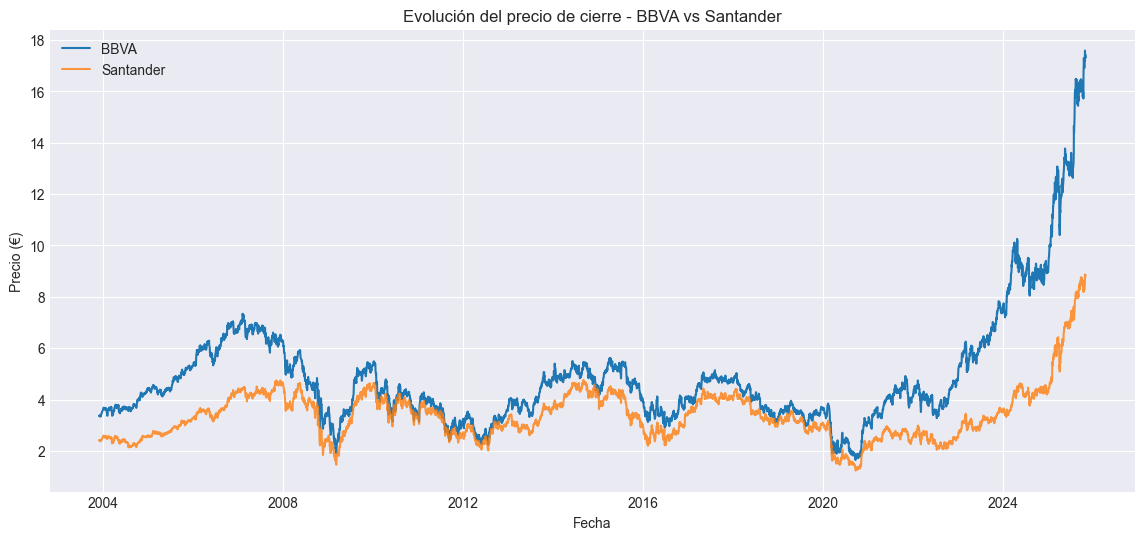

In [223]:
plt.figure(figsize=(14,6))
plt.plot(bbva_full['BBVA_Close'], label='BBVA')
plt.plot(santander_full['Santander_Close'], label='Santander', alpha=0.8)
plt.title('Evolución del precio de cierre - BBVA vs Santander')
plt.xlabel('Fecha')
plt.ylabel('Precio (€)')
plt.legend()
plt.show()


#### 2.5 Análisis de retornos logarítmicos y volatilidad

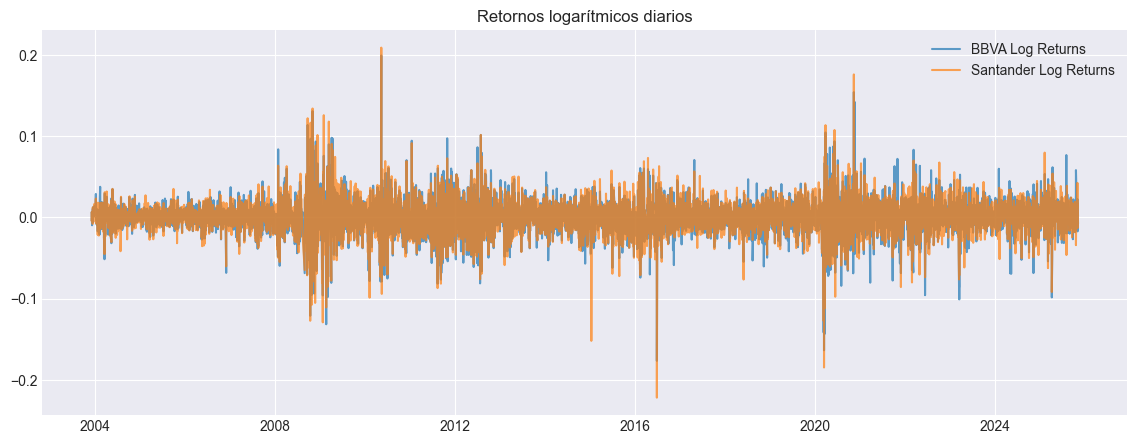

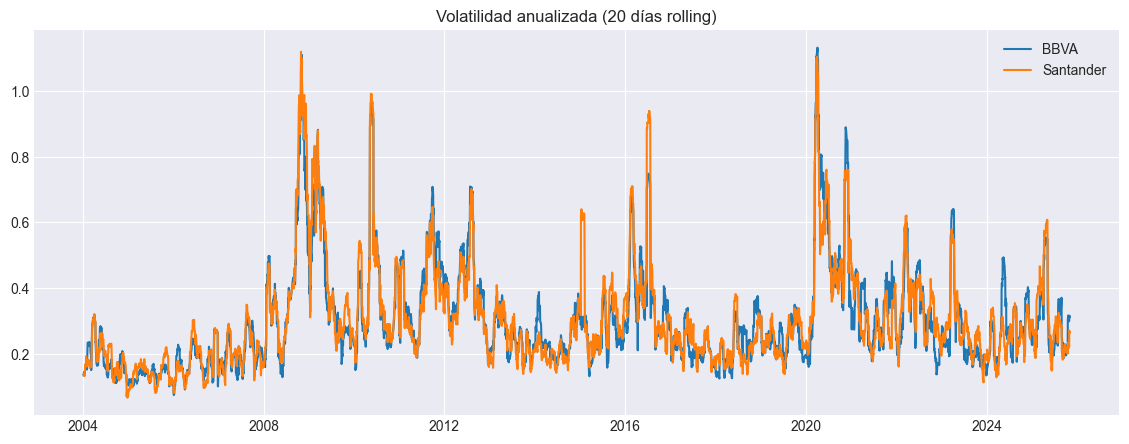

In [224]:
for df, name in zip([bbva_full, santander_full], ['BBVA', 'Santander']):
    df[f'{name}_LogReturn'] = np.log(df[f'{name}_Close']).diff()
    df[f'{name}_Volatility20'] = df[f'{name}_LogReturn'].rolling(20).std() * np.sqrt(252)

# Graficar retornos logarítmicos
plt.figure(figsize=(14,5))
plt.plot(bbva_full[f'BBVA_LogReturn'], label='BBVA Log Returns', alpha=0.7)
plt.plot(santander_full[f'Santander_LogReturn'], label='Santander Log Returns', alpha=0.7)
plt.title('Retornos logarítmicos diarios')
plt.legend()
plt.show()

# Graficar volatilidad (anualizada, 20 días)
plt.figure(figsize=(14,5))
plt.plot(bbva_full[f'BBVA_Volatility20'], label='BBVA')
plt.plot(santander_full[f'Santander_Volatility20'], label='Santander')
plt.title('Volatilidad anualizada (20 días rolling)')
plt.legend()
plt.show()


#### 2.6 Correlación entre BBVA, Santander y variables macroeconómicas

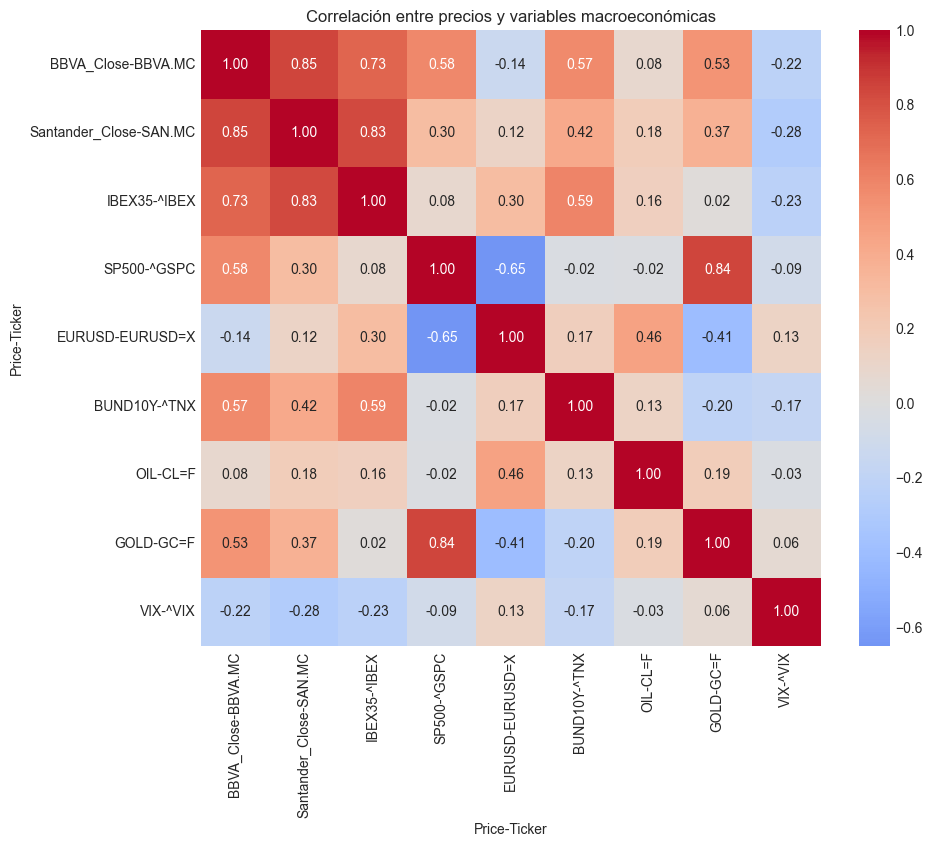

In [225]:
# Unir ambos datasets en un solo DataFrame para analizar correlaciones conjuntas
merged = bbva_full[['BBVA_Close']].join(santander_full[['Santander_Close']], how='inner')
merged = merged.join(macro_df, how='inner')

# Seleccionar variables relevantes
cols_corr = ['BBVA_Close','Santander_Close','IBEX35','SP500','EURUSD','BUND10Y','OIL','GOLD','VIX']
corr = merged[cols_corr].corr()

# Heatmap de correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlación entre precios y variables macroeconómicas")
plt.show()


#### 2.7 Estacionalidad: día de la semana, mes, año

<Figure size 1000x400 with 0 Axes>

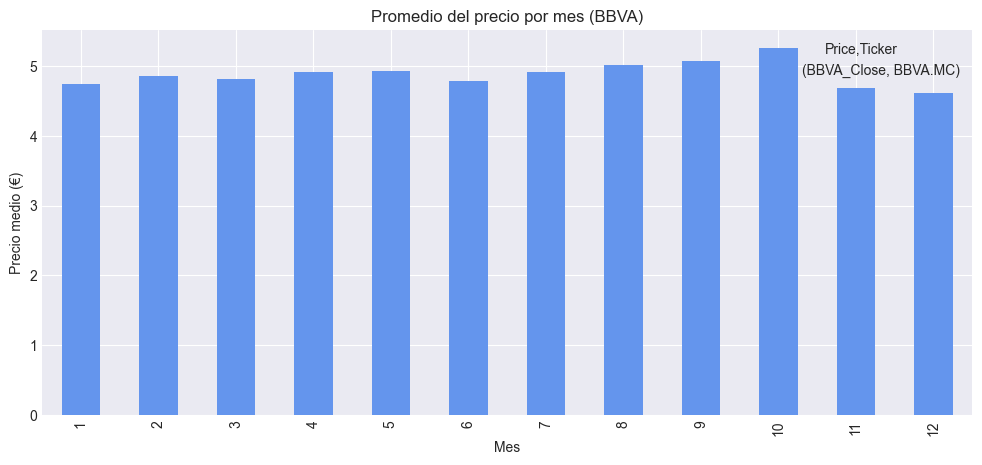

In [226]:
# Asegurar que el índice es datetime
bbva_full.index = pd.to_datetime(bbva_full.index, errors='coerce')

# Agregar columnas de calendario
bbva_full['Year'] = bbva_full.index.year
bbva_full['Month'] = bbva_full.index.month
bbva_full['DayOfWeek'] = bbva_full.index.dayofweek

# Promedio mensual
monthly_mean = bbva_full.groupby('Month')['BBVA_Close'].mean()

plt.figure(figsize=(10,4))
monthly_mean.plot(kind='bar', color='cornflowerblue')
plt.title('Promedio del precio por mes (BBVA)')
plt.xlabel('Mes')
plt.ylabel('Precio medio (€)')
plt.show()


#### 2.8 Descomposición de series temporales

In [227]:
# Asegurarnos de que no hay NaN ni infinitos en la serie
bbva_close = bbva_full['BBVA_Close'].replace([np.inf, -np.inf], np.nan).interpolate(method='linear').dropna()
santander_close = santander_full['Santander_Close'].replace([np.inf, -np.inf], np.nan).interpolate(method='linear').dropna()

print("BBVA NaNs después de limpiar:", bbva_close.isna().sum())
print("Santander NaNs después de limpiar:", santander_close.isna().sum())


BBVA NaNs después de limpiar: Ticker
BBVA.MC    0
dtype: int64
Santander NaNs después de limpiar: Ticker
SAN.MC    0
dtype: int64


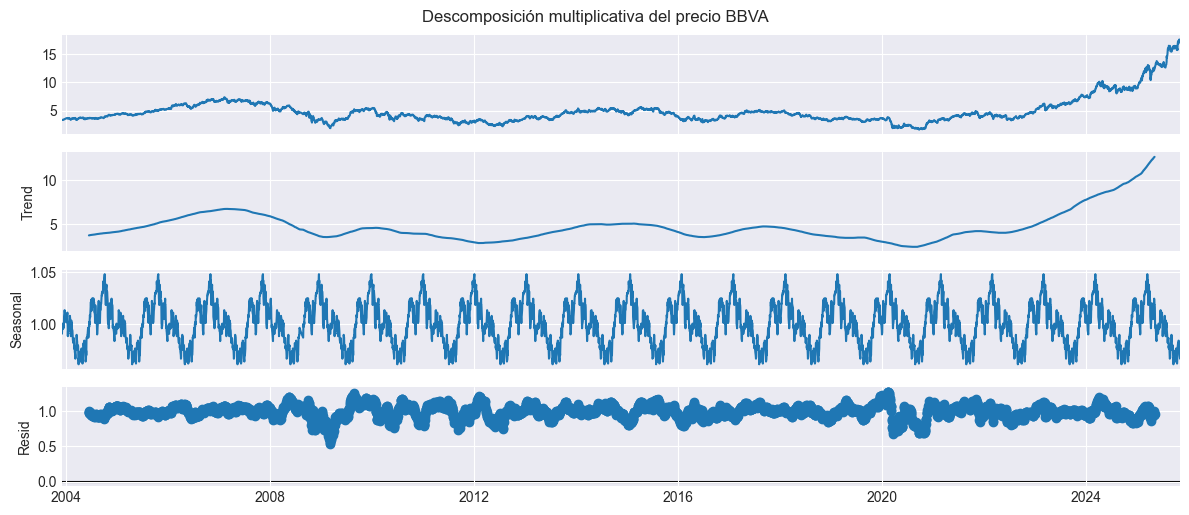

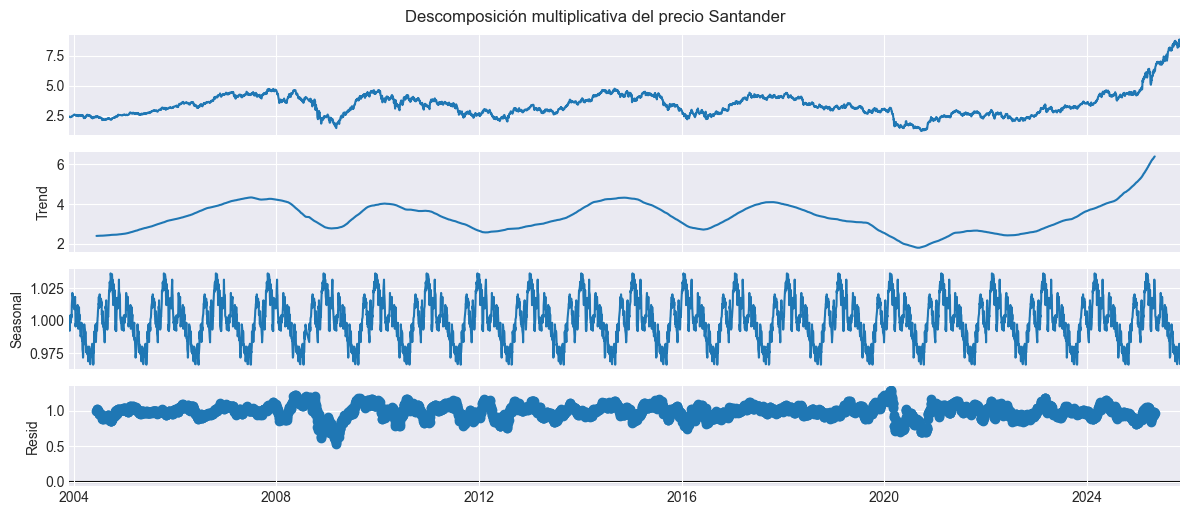

In [228]:
# Descomposición estacional
result = seasonal_decompose(bbva_close, model='multiplicative', period=252)
result.plot()
plt.suptitle("Descomposición multiplicativa del precio BBVA", y=1.02)
plt.show()

result2 = seasonal_decompose(santander_close, model='multiplicative', period=252)
result2.plot()
plt.suptitle("Descomposición multiplicativa del precio Santander", y=1.02)
plt.show()


#### 2.9 Test de estacionariedad (ADF Test)

In [229]:
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'--- ADF Test: {title} ---')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print('Estacionaria' if result[1] < 0.05 else 'No estacionaria')

adf_test(bbva_full['BBVA_Close'], 'BBVA Close')
adf_test(santander_full['Santander_Close'], 'Santander Close')
adf_test(bbva_full['BBVA_LogReturn'], 'BBVA Log Returns')
adf_test(santander_full['Santander_LogReturn'], 'Santander Log Returns')


--- ADF Test: BBVA Close ---
ADF Statistic: 2.926
p-value: 1.000
No estacionaria
--- ADF Test: Santander Close ---
ADF Statistic: 0.302
p-value: 0.977
No estacionaria
--- ADF Test: BBVA Log Returns ---
ADF Statistic: -26.723
p-value: 0.000
Estacionaria
--- ADF Test: Santander Log Returns ---
ADF Statistic: -43.451
p-value: 0.000
Estacionaria


#### 2.10 Detección de eventos extremos (outliers financieros)

In [230]:
# Detección de retornos extremos (> 3 desviaciones estándar)
for df, name in zip([bbva_full, santander_full], ['BBVA','Santander']):
    z = np.abs((df[f'{name}_LogReturn'] - df[f'{name}_LogReturn'].mean()) / df[f'{name}_LogReturn'].std())
    outliers = df[z > 3]
    print(f"\nEventos extremos {name}: {len(outliers)} días")
    if not outliers.empty:
        print(outliers.tail())



Eventos extremos BBVA: 87 días
Price      BBVA_Close       High        Low       Open    Volume  \
Ticker        BBVA.MC    BBVA.MC    BBVA.MC    BBVA.MC   BBVA.MC   
Date                                                               
2024-04-30   9.494966  10.241499   9.387652  10.190174  29250104   
2024-05-09   8.958395   9.189819   8.958395   9.189819  25561390   
2024-11-06   8.629787   9.081961   8.556670   9.008844  25327856   
2025-04-04  10.929139  11.852728  10.616466  11.847918  28042404   
2025-07-31  14.640000  14.790000  13.965000  14.000000  21012989   

Price             IBEX35        SP500    EURUSD BUND10Y        OIL  \
Ticker             ^IBEX        ^GSPC  EURUSD=X    ^TNX       CL=F   
Date                                                                 
2024-04-30  10854.400391  5035.689941  1.071570   4.686  81.930000   
2024-05-09  11050.099609  5214.080078  1.074691   4.449  79.260002   
2024-11-06  11495.299805  5929.040039  1.093446   4.426  71.690002   
202

#### 2.11 Correlación dinámica (rolling correlation)

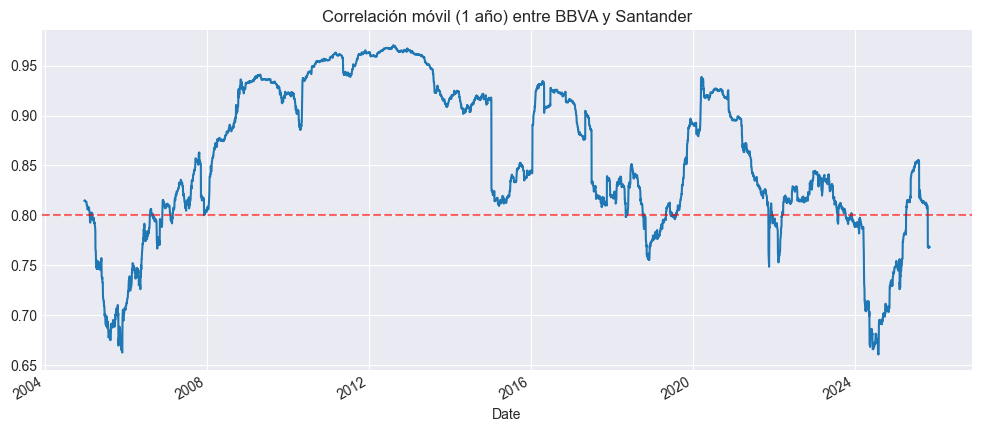

In [231]:
rolling_corr = bbva_full['BBVA_LogReturn'].rolling(252).corr(santander_full['Santander_LogReturn'])
rolling_corr.plot(title="Correlación móvil (1 año) entre BBVA y Santander")
plt.axhline(0.8, color='red', linestyle='--', alpha=0.6)
plt.show()


RESUMEN DEL EDA 
| Análisis            | Conclusión típica                                           |
| ------------------- | ----------------------------------------------------------- |
| **Tendencia**       | Fuerte influencia de ciclos macro (crisis 2008, 2012, 2020) |
| **Correlación**     | BBVA y Santander muy correlacionados (r > 0.8)              |
| **Volatilidad**     | Picos claros en crisis financieras                          |
| **Estacionalidad**  | Baja o nula en precios diarios                              |
| **Macro**           | Alta dependencia con IBEX, SP500, VIX y EURUSD              |
| **Estacionariedad** | Precios no estacionarios, retornos sí                       |


## 3. Construcción de features y preparación para RNN (ingeniería de variables, normalización y creación de secuencias temporales).

In [232]:
# !pip install yfinance pandas numpy scikit-learn tensorflow matplotlib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
import os


#### 3.1 Construcción de features técnicos

In [233]:
def ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

def sma(series, window):
    return series.rolling(window).mean()

def rsi(series, window=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    ma_up = up.ewm(alpha=1/window, adjust=False).mean()
    ma_down = down.ewm(alpha=1/window, adjust=False).mean()
    rs = ma_up / (ma_down + 1e-9)
    return 100 - (100 / (1 + rs))

def macd(series, fast=12, slow=26, signal=9):
    ema_fast = ema(series, fast)
    ema_slow = ema(series, slow)
    macd_line = ema_fast - ema_slow
    signal_line = ema(macd_line, signal)
    hist = macd_line - signal_line
    return macd_line, signal_line, hist

def bollinger_bands(series, window=20, n_std=2):
    ma = series.rolling(window).mean()
    std = series.rolling(window).std()
    upper = ma + n_std * std
    lower = ma - n_std * std
    return ma, upper, lower

def atr(df, window=14):
    high = df["High"]
    low = df["Low"]
    close = df["Close"]
    tr = pd.concat([
        (high - low).abs(),
        (high - close.shift()).abs(),
        (low - close.shift()).abs()
    ], axis=1).max(axis=1)
    return tr.rolling(window).mean()

def build_features(df):
    df = df.copy()
    df["return"] = df["Close"].pct_change()
    df["logret"] = np.log(df["Close"]).diff()
    df["ma10"] = sma(df["Close"], 10)
    df["ma20"] = sma(df["Close"], 20)
    df["ema10"] = ema(df["Close"], 10)
    df["ema20"] = ema(df["Close"], 20)
    df["rsi14"] = rsi(df["Close"], 14)
    df["atr14"] = atr(df, 14)
    df["volatility"] = df["logret"].rolling(20).std() * np.sqrt(252)
    macd_line, macd_signal, macd_hist = macd(df["Close"])
    df["macd"], df["macd_signal"], df["macd_hist"] = macd_line, macd_signal, macd_hist
    ma, upper, lower = bollinger_bands(df["Close"])
    df["bb_mid"], df["bb_upper"], df["bb_lower"] = ma, upper, lower
    df["dayofweek"] = df.index.dayofweek
    df["month"] = df.index.month
    df["is_month_start"] = df.index.is_month_start.astype(int)
    df["is_month_end"] = df.index.is_month_end.astype(int)
    for lag in range(1, 6):
        df[f"lag_{lag}"] = df["Close"].shift(lag)
    df = df.dropna()
    return df


#### Crear features

In [234]:
print(bbva_full.columns)


MultiIndex([(       'BBVA_Close',  'BBVA.MC'),
            (             'High',  'BBVA.MC'),
            (              'Low',  'BBVA.MC'),
            (             'Open',  'BBVA.MC'),
            (           'Volume',  'BBVA.MC'),
            (           'IBEX35',    '^IBEX'),
            (            'SP500',    '^GSPC'),
            (           'EURUSD', 'EURUSD=X'),
            (          'BUND10Y',     '^TNX'),
            (              'OIL',     'CL=F'),
            (             'GOLD',     'GC=F'),
            (              'VIX',     '^VIX'),
            (   'BBVA_LogReturn',         ''),
            ('BBVA_Volatility20',         ''),
            (             'Year',         ''),
            (            'Month',         ''),
            (        'DayOfWeek',         '')],
           names=['Price', 'Ticker'])


In [235]:
### aplanar las columnas 
# --- APLANAR COLUMNAS MULTIINDEX PARA BBVA Y SANTANDER ---
bbva_full.columns = [f"{col[0]}" for col in bbva_full.columns]
santander_full.columns = [f"{col[0]}" for col in santander_full.columns]


In [236]:
print(bbva_full.columns)


Index(['BBVA_Close', 'High', 'Low', 'Open', 'Volume', 'IBEX35', 'SP500',
       'EURUSD', 'BUND10Y', 'OIL', 'GOLD', 'VIX', 'BBVA_LogReturn',
       'BBVA_Volatility20', 'Year', 'Month', 'DayOfWeek'],
      dtype='object')


In [237]:
# Crear datasets enriquecidos con indicadores técnicos y lags
bbva_feat = build_features(bbva_full.rename(columns={'BBVA_Close': 'Close'}))
santander_feat = build_features(santander_full.rename(columns={'Santander_Close': 'Close'}))


# Revisar resultado
print(bbva_feat.head())


               Close      High       Low      Open    Volume       IBEX35  \
Date                                                                        
2004-01-08  3.669432  3.715178  3.653094  3.669432  37673831  7943.392090   
2004-01-09  3.666164  3.705375  3.620419  3.666164  41943206  7924.592285   
2004-01-12  3.633225  3.643107  3.606874  3.633225  75457778  7934.592285   
2004-01-13  3.626638  3.666165  3.620050  3.626638  70384360  7946.092285   
2004-01-14  3.613462  3.633226  3.593699  3.613462  32808677  7978.091797   

                  SP500    EURUSD  BUND10Y        OIL  ...  bb_lower  \
Date                                                   ...             
2004-01-08  1131.920044  1.277498    4.249  33.980000  ...  3.220046   
2004-01-09  1121.859985  1.285892    4.086  34.310001  ...  3.223706   
2004-01-12  1127.229980  1.274096    4.083  34.720001  ...  3.231222   
2004-01-13  1121.219971  1.278593    4.028  34.430000  ...  3.240500   
2004-01-14  1130.520020  1.2

#### 3.2 División temporal (train, val, test)

In [238]:
def split_data(df, train_size=0.7, val_size=0.15):
    n = len(df)
    train_end = int(n * train_size)
    val_end = int(n * (train_size + val_size))
    return df.iloc[:train_end], df.iloc[train_end:val_end], df.iloc[val_end:]

train_df, val_df, test_df = split_data(bbva_feat)
print(f"Tamaños: train={len(train_df)}, val={len(val_df)}, test={len(test_df)}")


Tamaños: train=3768, val=808, test=808


#### 3.3 Escalado y normalización

In [239]:
from sklearn.preprocessing import StandardScaler
import pickle

# 1️⃣ Separar features y target
feature_cols = [c for c in bbva_feat.columns if c != "Close"]

# 2️⃣ Escalar features y target por separado
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Ajustar escaladores SOLO con datos de entrenamiento
scaler_X.fit(train_df[feature_cols])
scaler_y.fit(train_df[["Close"]])

# Transformar train, val, test
train_scaled = pd.DataFrame(scaler_X.transform(train_df[feature_cols]), index=train_df.index, columns=feature_cols)
val_scaled   = pd.DataFrame(scaler_X.transform(val_df[feature_cols]), index=val_df.index, columns=feature_cols)
test_scaled  = pd.DataFrame(scaler_X.transform(test_df[feature_cols]), index=test_df.index, columns=feature_cols)

# Guardar los escaladores si quieres usarlos luego
with open("scaler_bbva_X.pkl", "wb") as f:
    pickle.dump(scaler_X, f)

with open("scaler_bbva_y.pkl", "wb") as f:
    pickle.dump(scaler_y, f)


#### 3.4 Crear secuencias para RNN


In [ ]:
def create_sequences(data, target, lookback=140, horizon=1):
    X, y = [], []
    for i in range(lookback, len(data) - horizon + 1):
        X.append(data[i - lookback:i])
        y.append(target[i + horizon - 1])
    return np.array(X), np.array(y)

lookback = 30

# Escalar el target ANTES de crear secuencias
train_target_scaled = scaler_y.transform(train_df[["Close"]])
val_target_scaled   = scaler_y.transform(val_df[["Close"]])
test_target_scaled  = scaler_y.transform(test_df[["Close"]])

X_train, y_train = create_sequences(train_scaled.values, train_target_scaled, lookback)
X_val, y_val     = create_sequences(val_scaled.values, val_target_scaled, lookback)
X_test, y_test   = create_sequences(test_scaled.values, test_target_scaled, lookback)

print("Shapes ->", X_train.shape, y_train.shape, X_val.shape, X_test.shape)


Shapes -> (3708, 60, 40) (3708, 1) (748, 60, 40) (748, 60, 40)


#### 3.5 Guardar datasets

In [241]:
np.save("X_train_bbva.npy", X_train)
np.save("y_train_bbva.npy", y_train)
np.save("X_val_bbva.npy", X_val)
np.save("y_val_bbva.npy", y_val)
np.save("X_test_bbva.npy", X_test)
np.save("y_test_bbva.npy", y_test)


#### 3.6 Visualización de features y correlaciones

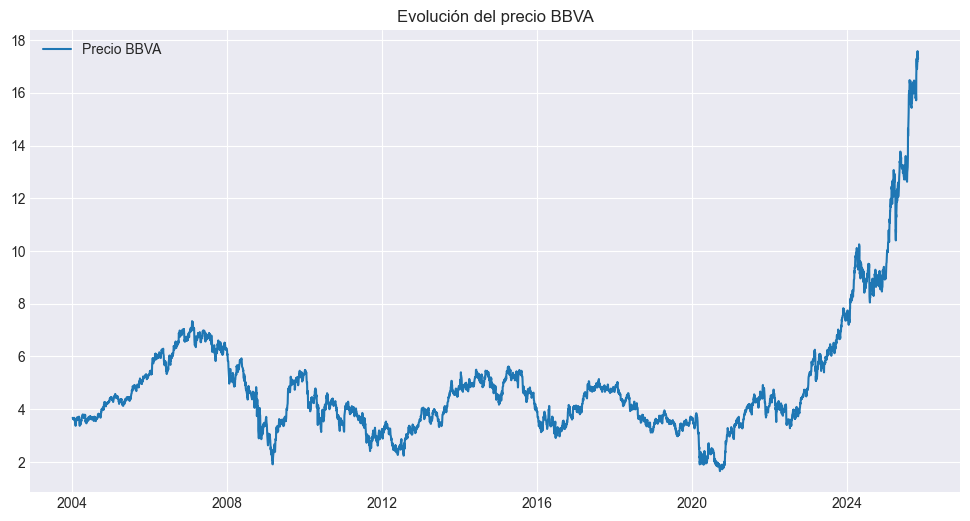

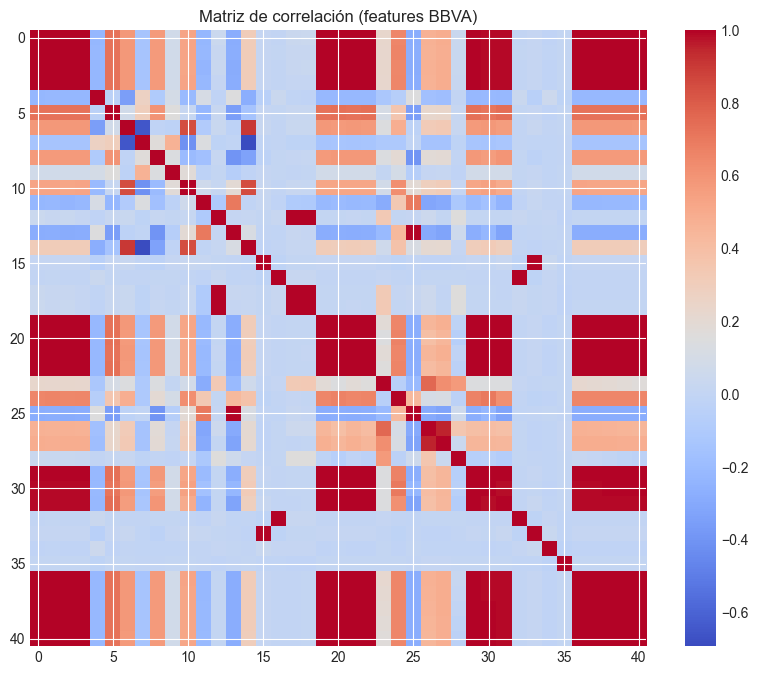

In [242]:
plt.figure(figsize=(12,6))
plt.plot(bbva_feat["Close"], label="Precio BBVA")
plt.title("Evolución del precio BBVA")
plt.legend()
plt.show()

corr = bbva_feat.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.title("Matriz de correlación (features BBVA)")
plt.colorbar()
plt.show()


## 4 Modelado y Predicción con RNN, LSTM y GRU

#### 4.1 Importaciones y configuración inicial

In [243]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle

# Cargar datasets (si ya los guardaste en disco)
X_train = np.load("X_train_bbva.npy")
y_train = np.load("y_train_bbva.npy")
X_val = np.load("X_val_bbva.npy")
y_val = np.load("y_val_bbva.npy")
X_test = np.load("X_test_bbva.npy")
y_test = np.load("y_test_bbva.npy")

print("Shapes:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Shapes:
Train: (3708, 60, 40) (3708, 1)
Val: (748, 60, 40) (748, 1)
Test: (748, 60, 40) (748, 1)


#### 4.2 Función genérica para construir el modelo

In [244]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_rnn_model(model_type="LSTM", input_shape=(60, 20), hidden_units=64, dropout_rate=0.3, lr=1e-3):
    """
    Modelo RNN mejorado para regresión.
    """
    model = Sequential()

    # Capa recurrente principal (con return_sequences=True para permitir profundidad)
    if model_type == "SimpleRNN":
        model.add(SimpleRNN(hidden_units, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout_rate))
        model.add(SimpleRNN(hidden_units // 2))
    elif model_type == "LSTM":
        model.add(LSTM(hidden_units, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(hidden_units // 2))
    elif model_type == "GRU":
        model.add(GRU(hidden_units, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout_rate))
        model.add(GRU(hidden_units // 2))
    else:
        raise ValueError("Tipo no válido")

    # Normalización y capa densa
    model.add(BatchNormalization())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(dropout_rate / 2))
    model.add(Dense(1))  # salida regresión

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model


#### 4.3 Entrenamiento de los tres modelos

In [ ]:
models = {}
histories = {}
results = {}

input_shape = X_train.shape[1:]  # (timesteps, features)

callbacks = [EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]

for model_type in ["SimpleRNN", "LSTM", "GRU"]:
    print(f"\nEntrenando modelo {model_type}...")
    model = build_rnn_model(model_type=model_type, input_shape=input_shape, hidden_units=64)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    models[model_type] = model
    histories[model_type] = history

    # Evaluar en test
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    results[model_type] = {"MSE": test_loss, "MAE": test_mae}
    # Nueva línea: reconstruir precios reales
    y_test_pred = scaler_y.inverse_transform(model.predict(X_test))
    



Entrenando modelo SimpleRNN...
Epoch 1/100


c:\Users\aserr\Documents\GitHub\Caso2_BBVA\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5041 - mae: 0.5443 - val_loss: 0.4080 - val_mae: 0.4759
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2100 - mae: 0.3642 - val_loss: 0.2641 - val_mae: 0.3872
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1610 - mae: 0.3163 - val_loss: 0.2778 - val_mae: 0.3874
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1383 - mae: 0.2944 - val_loss: 0.2263 - val_mae: 0.3462
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1118 - mae: 0.2647 - val_loss: 0.1993 - val_mae: 0.3146
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0986 - mae: 0.2470 - val_loss: 0.2317 - val_mae: 0.3379
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0880 - mae: 0.2334 - val_loss: 0.2255 - val_mae: 0.3216
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0860 - mae: 0.2302 - val_loss: 0.1452 - val_mae: 0.2664
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0710 -

In [ ]:
# Predicción final y reconstrucción de precios reales
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

plt.figure(figsize=(12,6))
plt.plot(test_df.index[lookback:], test_df["Close"][lookback:], label="Real")
plt.plot(test_df.index[lookback:], y_pred, label="Predicción")
plt.title("Predicción vs Real")
plt.legend()
plt.show()


#### 4.4 Comparación de resultados

In [246]:
print("\n--- Resultados en Test ---")
for name, res in results.items():
    print(f"{name}: MSE={res['MSE']:.6f}, MAE={res['MAE']:.6f}")



--- Resultados en Test ---
SimpleRNN: MSE=16.165073, MAE=3.064574
LSTM: MSE=24.286039, MAE=3.947279
GRU: MSE=16.806963, MAE=3.249628


#### 4.5 Visualización del entrenamiento

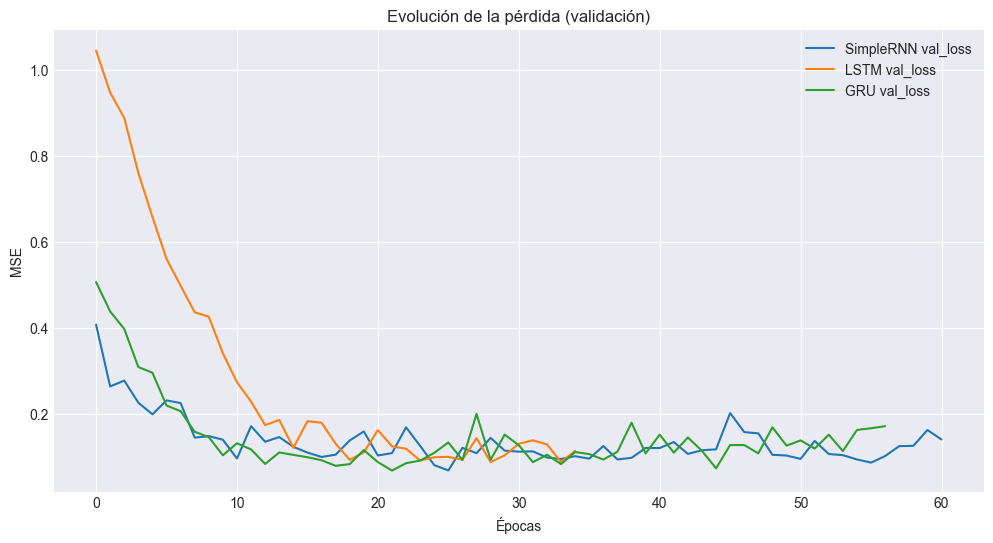

In [247]:
plt.figure(figsize=(12,6))
for name, hist in histories.items():
    plt.plot(hist.history['val_loss'], label=f"{name} val_loss")
plt.title("Evolución de la pérdida (validación)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.show()


#### 4.6 Predicciones y comparación visual

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


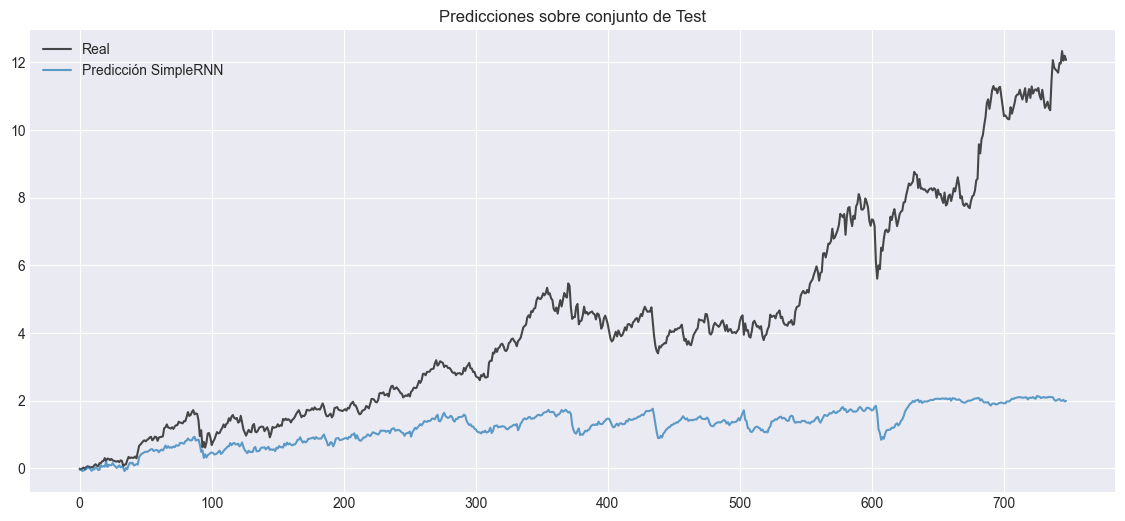

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


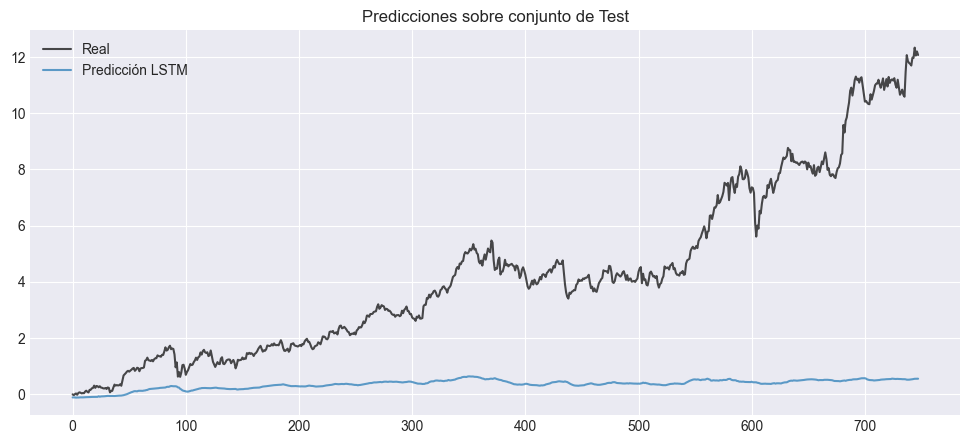

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


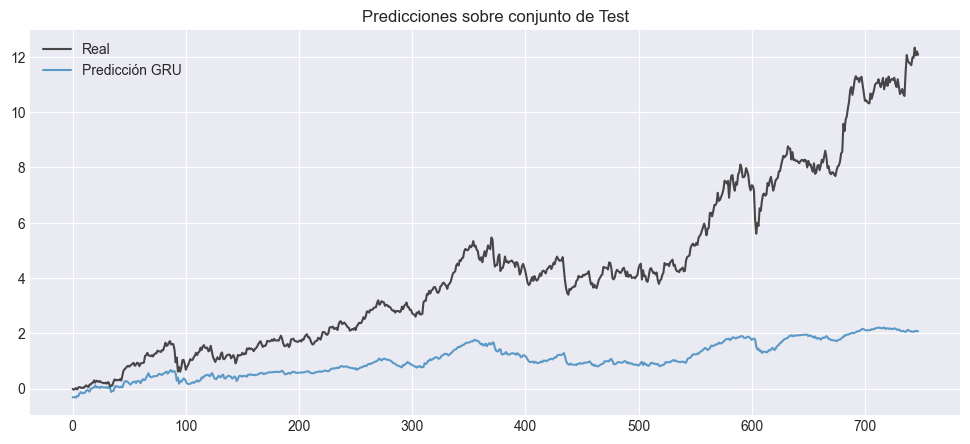

In [248]:
plt.figure(figsize=(14,6))

for name, model in models.items():
    preds = model.predict(X_test)
    plt.plot(y_test, label="Real", color="black", alpha=0.7)
    plt.plot(preds, label=f"Predicción {name}", alpha=0.7)
    plt.title("Predicciones sobre conjunto de Test")
    plt.legend()
    plt.show()


#### 4.7 Métricas adicionales y evaluación

In [249]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for name, model in models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name} -> MSE: {mse:.6f}, MAE: {mae:.6f}, R²: {r2:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
SimpleRNN -> MSE: 16.165076, MAE: 3.064574, R²: -0.7132
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
LSTM -> MSE: 24.286040, MAE: 3.947279, R²: -1.5738
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
GRU -> MSE: 16.806964, MAE: 3.249628, R²: -0.7812


#### 4.8 Guardar modelos entrenados

#### 4.9 interpretación 
| Modelo        | Características                                      | Ventajas                              | Inconvenientes                                            |
| ------------- | ---------------------------------------------------- | ------------------------------------- | --------------------------------------------------------- |
| **SimpleRNN** | Captura dependencias cortas. Estructura básica.      | Rápido de entrenar.                   | No maneja bien secuencias largas (problema de gradiente). |
| **LSTM**      | Tiene celdas de memoria, maneja dependencias largas. | Mejor estabilidad, más preciso.       | Más lento, más parámetros.                                |
| **GRU**       | Simplifica LSTM (menos puertas).                     | Equilibrio entre rendimiento y coste. | Puede sobreajustar si pocos datos.                        |
